In [11]:
# 경고뜨는 거 막는 코드
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2019년 1월 1일부터 500일 동안의 XYZ 위젯 컴퍼니의 위젯 판매량 데이터 (단위는 1천 달러)
import pandas as pd
df = pd.read_csv('C:/Users/Awesomemin/Desktop/연구아카이브/Time_Series_with_Python/data/widget_sales.csv')
df

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


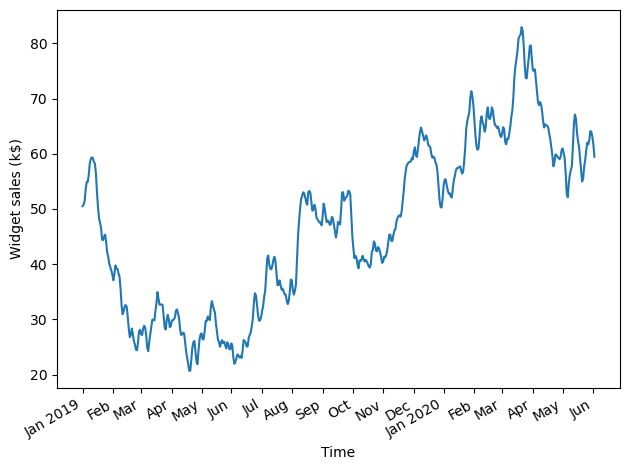

In [3]:
# 데이터 시각화
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
# 정상성 체크: ADF TEST
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['widget_sales'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662065399912
p-value: 0.5274845354236496


In [7]:
# 판매액 1차 차분 
import numpy as np

widget_sales_diff = np.diff(df['widget_sales'], n=1)

In [9]:
# 차분한 데이터 정상성 여부 검정: ADF
ADF_result = adfuller(widget_sales_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657781399526
p-value: 7.076922776476906e-19


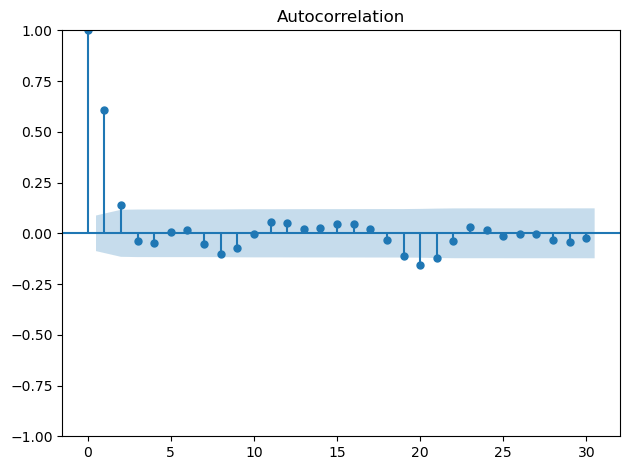

In [10]:
# 정상성을 만족한 것을 확인했으니 ACF함수를 도식화 해보자.
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(widget_sales_diff, lags = 30)

plt.tight_layout()

## 이동평균과정 예측하기 

In [13]:
# 데이터 앞부분 90%를 Train data로 사용하고, 나머지 10%는 예측에 대한 Test data로 사용
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


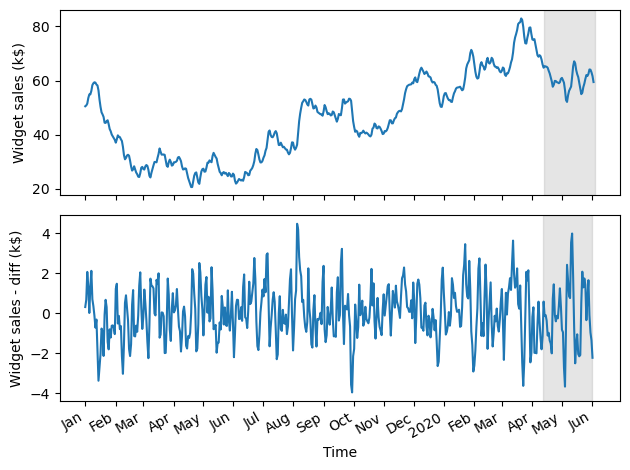

In [14]:
# 차분된 process와 데이터 원본에 대한 예측 기간 시각화 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout() ## 색칠된 부분에 해당하는 기간의 판매량을 예측하는 것임